In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set()
warnings.simplefilter('ignore')

# Data Preprocessing

Let's get the dataset into a pandas dataframe

In [2]:
data=pd.read_csv('creditcard.csv')
df=data.copy()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.shape

(284807, 31)

In [7]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [8]:
df.Time.tail(15)

284792    172774.0
284793    172775.0
284794    172777.0
284795    172778.0
284796    172780.0
284797    172782.0
284798    172782.0
284799    172783.0
284800    172784.0
284801    172785.0
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, dtype: float64

# Frequency of frauds before moving forward

In [9]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

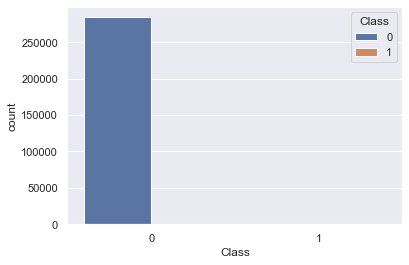

In [10]:
sns.countplot(x=df['Class'],hue=df['Class'])

By looking at the above statistics, we can see that the data is highly imbalanced. Only 492 out of 284807 are fraud.

# Distribution of amount

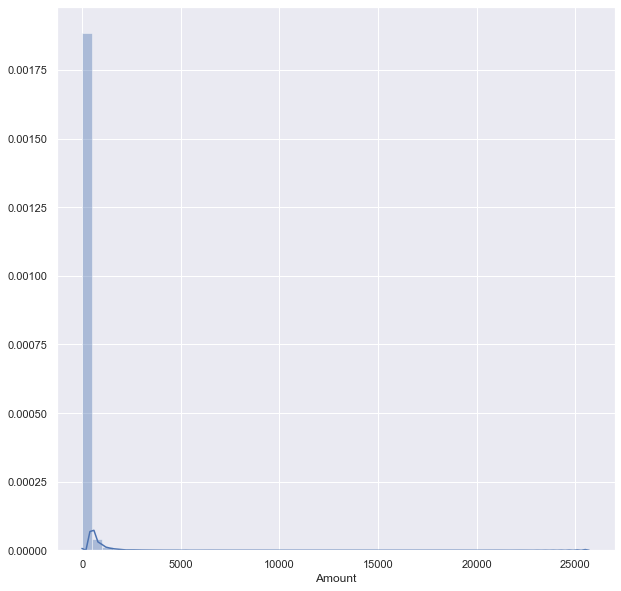

In [11]:
plt.figure(figsize=(10,10))
sns.distplot(df['Amount'])

Since, it is a little difficult to see. Let's engineer a new feature of bins.

In [12]:
df['Amount-Bins'] = ''

Now, let's set the bins and their labels.

In [13]:
def make_bins(predictor, size=50):
    '''
    Takes the predictor (a series or a dataframe of single predictor) and size of bins
    Returns bins and bin labels
    '''
    bins = np.linspace(predictor.min(), predictor.max(), num=size)

    bin_labels = []

    # Index of the final element in bins list
    bins_last_index = bins.shape[0] - 1

    for id, val in enumerate(bins):
        if id == bins_last_index:
            continue
        val_to_put = str(int(bins[id])) + ' to ' + str(int(bins[id + 1]))
        bin_labels.append(val_to_put)
    
    return bins, bin_labels

In [14]:
bins, bin_labels = make_bins(df['Amount'], size=10)

Now, adding bins in the column Amount-Bins.

In [15]:
df['Amount-Bins'] = pd.cut(df.Amount, bins=bins,
                           labels=bin_labels, include_lowest=True)
df['Amount-Bins'].head().to_frame()

,Amount-Bins
0,0 to 2854
1,0 to 2854
2,0 to 2854
3,0 to 2854
4,0 to 2854


Let's plot the bins

In [16]:
df['Amount-Bins'].value_counts()

0 to 2854         284484
2854 to 5709         285
5709 to 8563          28
8563 to 11418          4
11418 to 14272         3
17127 to 19982         2
22836 to 25691         1
19982 to 22836         0
14272 to 17127         0
Name: Amount-Bins, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

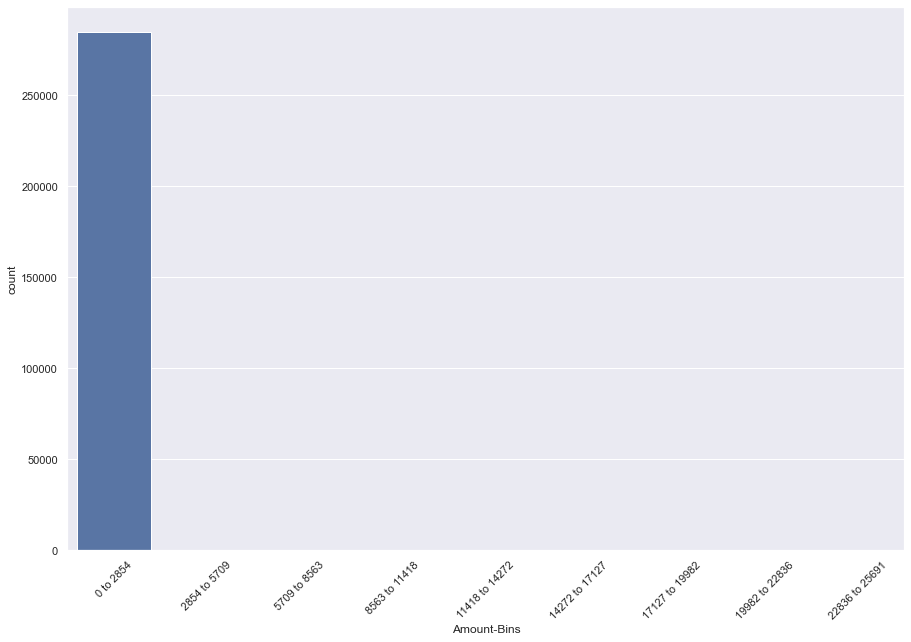

In [17]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Amount-Bins', data=df)
plt.xticks(rotation=45)

Since, count of values of Bins other than '0 to 2854' are difficult to view. Let's not insert the first one.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

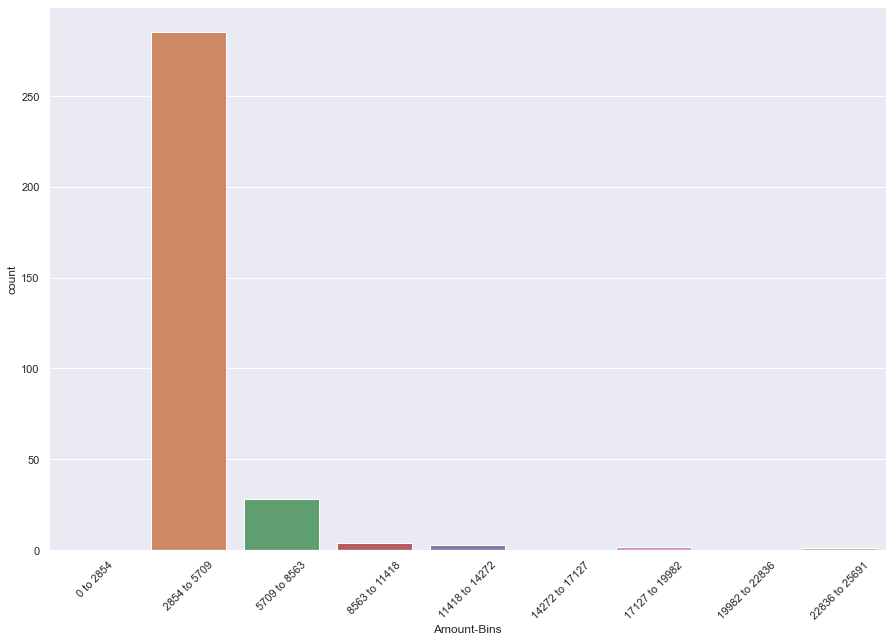

In [18]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Amount-Bins', data=df[~(df['Amount-Bins'] == '0 to 2854')])
plt.xticks(rotation=45)

We can see that mostly the amount is between 0 and 2854 euros.

# Predictive Modelling

Let's predict whether a is fraud or not, using machine learning.

# One-hot encoding the Amount-Bins

Since, for classification, we need to pass the data in numerical form. That's why we need to One-Hot encode the Amount-Bins column.
Note: We can also label encode values.

In [19]:
df_encoded = pd.get_dummies(data=df, columns=['Amount-Bins'])
df = df_encoded.copy()

In [20]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Class,Amount-Bins_0 to 2854,Amount-Bins_2854 to 5709,Amount-Bins_5709 to 8563,Amount-Bins_8563 to 11418,Amount-Bins_11418 to 14272,Amount-Bins_14272 to 17127,Amount-Bins_17127 to 19982,Amount-Bins_19982 to 22836,Amount-Bins_22836 to 25691
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0,1,0,0,0,0,0,0,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0,1,0,0,0,0,0,0,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0,1,0,0,0,0,0,0,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0,1,0,0,0,0,0,0,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0,1,0,0,0,0,0,0,0,0


# Breaking the dataset into training and testing

First, separating the response variable from the explanatory variables.

In [21]:
X = df.drop(labels='Class', axis=1)
y = df['Class']

X.shape, y.shape

((284807, 39), (284807,))

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.3, shuffle=True)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(199364, 39) (199364,)
(85443, 39) (85443,)


# Apply Machine Learning Algorithms

# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [25]:
# Training the algorithm
lr_model.fit(X_train, y_train)

LogisticRegression()

In [26]:
# Predictions on training and testing data
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)

In [27]:
# Importing the required metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

Let's first look at the confusion matrix

In [28]:
tn, fp, fn, tp = confusion_matrix(y_test, lr_pred_test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,85,51
Not Fraud,32,85275


Let's find the heat map for the same

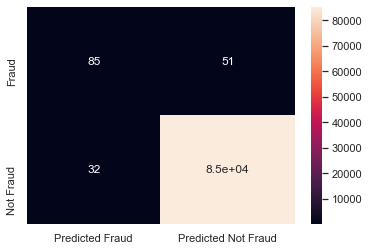

In [29]:
sns.heatmap(conf_matrix, annot=True)

Heatmap also suggests that the data is highly imbalanced.

Let's look at the accuracy score.

In [30]:
lr_accuracy = accuracy_score(y_test, lr_pred_test)
lr_accuracy

0.9990285921608558

We can see here that accuracy is great. Around 99.90%.
BUT WAIT
We know that the dataset is highly unbalanced and accuracy takes into account the whole confusion matrix. So we can say that this measure is not suitable.

Let's look at precision and recall.

In [31]:
lr_precision = precision_score(y_test, lr_pred_test)
lr_precision


0.7264957264957265

Recall:

In [32]:
lr_recall = recall_score(y_test, lr_pred_test)
lr_recall

0.625

Recall is very low in case of logistic regression. However, we may try to increase it by increasing the complexity of the model.

Although, let's check the recall for training dataset to get the idea of any overfitting we may be having.

In [33]:
lr_recall_train = recall_score(y_train, lr_pred_train)
lr_recall_train

0.6713483146067416

Well, we can see that the delta is small, only around 0.03. So, we can say that the model is not overfitting.

Let's look at the F1-Score. F1-Score may tell us that one of the precision or recall is very low.

In [34]:
from sklearn.metrics import f1_score

In [35]:
lr_f1 = f1_score(y_test, lr_pred_test)
lr_f1

0.6719367588932806

Let's look at the classification report.

In [36]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_test, lr_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.73      0.62      0.67       136

    accuracy                           1.00     85443
   macro avg       0.86      0.81      0.84     85443
weighted avg       1.00      1.00      1.00     85443



Let's look at the ROC curve.

Now, for the ROC Curve, we need the probabilites of Fraud happening (which is the probability of occurance of 1)

In [38]:
lr_pred_test_prob = lr_model.predict_proba(X_test)[:, 1]

Now, to draw the ROC Curve, we need to have True Positive Rate and False Positive Rate.

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score

In [40]:
fpr, tpr, threshold = roc_curve(y_test, lr_pred_test_prob)

Also, let's get the auc score.

In [41]:
lr_auc = roc_auc_score(y_test, lr_pred_test_prob)
lr_auc

0.9310750652142883

Now, let's define a function to plot the roc curve.

In [42]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    
    plt.show()

Let's plot the ROC Curve.

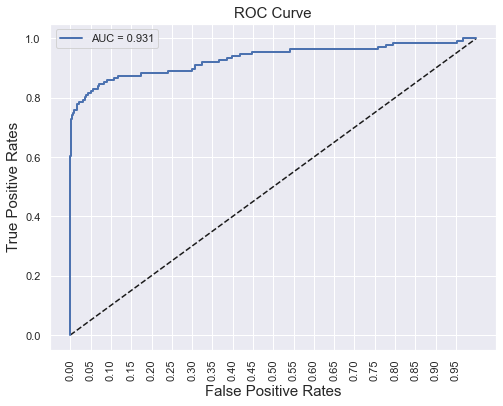

In [43]:
plot_roc_curve(fpr=fpr, tpr=tpr, label="AUC = %.3f" % lr_auc)

AUC is quite good. i.e. 0.931. Based on the data being highly imbalanced, we'll only check the AUC metric in later algorithms.

# Model Complexity

Let's try to train the Logistic Regression models on the 2nd degree of polynomials. Not going further 2nd degree because features are already too much. Otherwise, computer gives the MemoryError.

In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [45]:
# Getting the polynomial features
poly = PolynomialFeatures(degree=2)
xtrain_poly = poly.fit_transform(X_train)
xtest_poly = poly.fit_transform(X_test)

# Training the model
model = LogisticRegression()
model.fit(xtrain_poly, y_train)

# Getting the probabilities
train_prob = model.predict_proba(xtrain_poly)[:, 1]
test_prob = model.predict_proba(xtest_poly)[:, 1]

# Computing the ROC Score
roc_auc_score(y_train, train_prob), roc_auc_score(y_test, test_prob)

(0.9122902475491923, 0.9238498202685249)

Plotting ROC Curve for the Test data.

In [46]:
fpr_poly, tpr_poly, threshold_poly = roc_curve(y_test, test_prob)

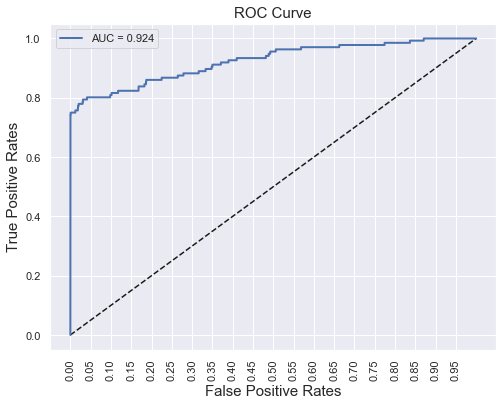

In [47]:
plot_roc_curve(fpr=fpr_poly, tpr=tpr_poly, label='AUC = %.3f' %  roc_auc_score(y_test, test_prob))

First degree is better in Logistic Regression case which gives 0.931 AUC Score.

Let's also check the Recall in case of model complexity.

In [48]:
recall_score(y_test, model.predict(xtest_poly))

0.75

Recall has increased when the model is made complex.

# Support Vector Machine

Let's try the Support Vector Machine algorithm.

Now, for support vector machines, we need to train the model after scaling the features. Let's first do that.

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
mms = MinMaxScaler()

In [51]:
# Let's first check the head of the explanatory variables which are to be scaled.
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Amount,Amount-Bins_0 to 2854,Amount-Bins_2854 to 5709,Amount-Bins_5709 to 8563,Amount-Bins_8563 to 11418,Amount-Bins_11418 to 14272,Amount-Bins_14272 to 17127,Amount-Bins_17127 to 19982,Amount-Bins_19982 to 22836,Amount-Bins_22836 to 25691
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,149.62,1,0,0,0,0,0,0,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,2.69,1,0,0,0,0,0,0,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,378.66,1,0,0,0,0,0,0,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,123.50,1,0,0,0,0,0,0,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,69.99,1,0,0,0,0,0,0,0,0


In [52]:
X_scaled = mms.fit_transform(X)

In [53]:
X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)
X_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Amount,Amount-Bins_0 to 2854,Amount-Bins_2854 to 5709,Amount-Bins_5709 to 8563,Amount-Bins_8563 to 11418,Amount-Bins_11418 to 14272,Amount-Bins_14272 to 17127,Amount-Bins_17127 to 19982,Amount-Bins_19982 to 22836,Amount-Bins_22836 to 25691
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.005824,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.000105,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.014739,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.004807,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.002724,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
xtrainS, xtestS, ytrainS, ytestS = train_test_split(
    X_scaled, y, random_state=42, test_size=0.30, shuffle=True)

In [55]:
print(xtrainS.shape, ytrainS.shape)
print(xtestS.shape, ytestS.shape)

(199364, 39) (199364,)
(85443, 39) (85443,)


In [56]:
from sklearn.svm import SVC

In [57]:
svc_model = SVC(kernel='linear', probability=True)

In [58]:
svc_model.fit(xtrainS, ytrainS)

SVC(kernel='linear', probability=True)

In [59]:
svc_pred = svc_model.predict(xtestS)

Let's first check he recall score.

In [60]:
svc_recall = recall_score(ytestS, svc_pred)

In [61]:
svc_recall

0.8014705882352942

Recall score is quite increased in case of SVC.

In [62]:
svc_pred_prob = svc_model.predict_proba(xtestS)[:, 1]

Now, let's draw the ROC Curve.

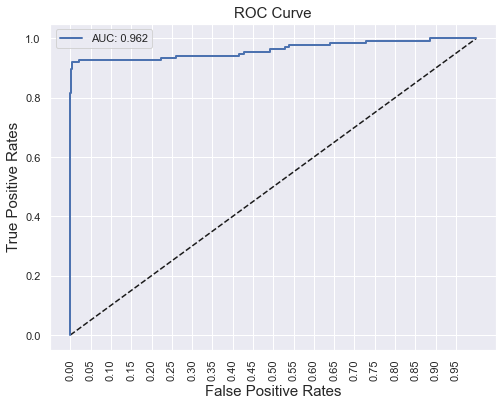

In [63]:
# First, getting the auc score
svc_auc = roc_auc_score(ytestS, svc_pred_prob)

# Now, let's get the fpr and tpr
fpr, tpr, threshold = roc_curve(ytestS, svc_pred_prob)

# Now, let's draw the curve
plot_roc_curve(fpr, tpr, 'AUC: %.3f' % svc_auc)

The score AUC Score SVC gave is also pretty great. But it's still less than Logistic Regression Model. But the Recall increased significantly.

Tuning the Hyper-parameters

Now, let's tune some of the hyper-parameters of SVM and then compare the scores.

In [64]:
# For Kernel = rbf
tuned_rbf = {'kernel': ['rbf'], 'gamma': [
    1e-2, 1e-3, 1e-4, 1e-5], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}

# For kernel = sigmoid
tuned_sigmoid = {'kernel': ['sigmoid'], 'gamma': [
    1e-2, 1e-3, 1e-4, 1e-5], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}

# For kernel = linear
tuned_linear = {'kernel': ['linear'], 'C': [
    0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}

In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [66]:
rs_rbf = RandomizedSearchCV(estimator=SVC(probability=True), 
        param_distributions=tuned_rbf, n_iter=500, n_jobs=4, scoring='roc_auc')

rs_sigmoid = RandomizedSearchCV(estimator=SVC(probability=True), 
        param_distributions=tuned_sigmoid, n_iter=500, n_jobs=4, scoring='roc_auc')

rs_linear = RandomizedSearchCV(estimator=SVC(probability=True), 
        param_distributions=tuned_linear, n_iter=500, n_jobs=4, scoring='roc_auc')

# For kernel rbf:

In [67]:
rs_rbf.fit(xtrainS, ytrainS)

RandomizedSearchCV(estimator=SVC(probability=True), n_iter=500, n_jobs=4,
                   param_distributions={'C': [0.001, 0.1, 0.1, 10, 25, 50, 100,
                                              1000],
                                        'gamma': [0.01, 0.001, 0.0001, 1e-05],
                                        'kernel': ['rbf']},
                   scoring='roc_auc')

In [68]:
rs_rbf.best_estimator_

SVC(C=1000, gamma=0.01, probability=True)

In [69]:
svc_rbf_best_est = rs_rbf.best_estimator_

Let's fit the model on the best rbf estimator.

In [70]:
svc_rbf_best_est.fit(xtrainS, ytrainS)

SVC(C=1000, gamma=0.01, probability=True)

In [71]:
svc_rbf_best_est_pred = svc_rbf_best_est.predict(xtestS)

In [72]:
svc_rbf_best_est_pred_proba = svc_rbf_best_est.predict_proba(xtestS)[:, 1]

Let's get the AUC Score.

In [73]:
svc_rbf_auc = roc_auc_score(ytestS, svc_rbf_best_est_pred_proba)

Recall Score.

In [74]:
svc_rbf_recall = recall_score(ytestS, svc_rbf_best_est_pred)
svc_rbf_recall

0.8308823529411765

Both the AUC and the Recall Scores are great. So let's draw the ROC Curve.

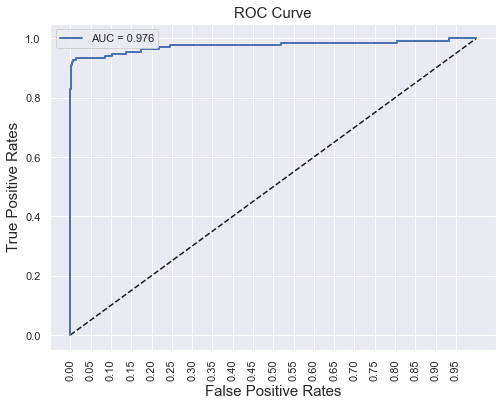

In [75]:
fpr, tpr, threshold = roc_curve(ytestS, svc_rbf_best_est_pred_proba)
plot_roc_curve(fpr, tpr, 'AUC = %.3f' % svc_rbf_auc)

# Now, for kernel sigmoid.

In [ ]:
rs_sigmoid.fit(xtrainS, ytrainS)

In [ ]:
svc_sigmoid = rs_sigmoid.best_estimator_

In [ ]:
svc_sigmoid.fit(xtrainS, ytrainS)

In [ ]:
svc_sigmoid_pred = svc_sigmoid.predict(xtestS)
svc_sigmoid_pred_proba = svc_sigmoid.predict_proba(xtestS)[:, 1]

AOC:

In [ ]:
svc_sigmoid_auc = roc_auc_score(ytestS, svc_sigmoid_pred_proba)
svc_sigmoid_auc

Recall:

In [ ]:
svc_sigmoid_recall = recall_score(ytestS, svc_sigmoid_pred)
svc_sigmoid_recall

In [ ]:
fpr, tpr, threshold = roc_curve(ytestS, svc_sigmoid_pred_proba)
plot_roc_curve(fpr, tpr, 'AUC = %.3f' % svc_sigmoid_auc)

Let's check for Linear kernel.

In [ ]:
rs_linear.fit(xtrainS, ytrainS)

In [ ]:
svc_linear = rs_linear.best_estimator_

In [ ]:
svc_linear.fit(xtrainS, ytrainS)

Getting the predictions and probabilities.

In [ ]:
svc_linear_pred = svc_linear.predict(xtestS)
svc_linear_pred_proba = svc_linear.predict_proba(xtestS)[:, 1]


AUC and ROC Curve

In [ ]:
svc_linear_auc = roc_auc_score(ytestS, svc_linear_pred_proba)

fpr, tpr, threshold = roc_curve(ytestS, svc_linear_pred_proba)
plot_roc_curve(fpr, tpr, 'AUC = %.3f' % svc_linear_auc)

Let's check the recall too.

In [ ]:
svc_linear_recall = recall_score(ytestS, svc_linear_pred)
svc_linear_recall

AUC is great in case of a linear kernel however it's less than that of rbf kernel. And its recall decreased quite a bit.

# Naive Bayes Algorithm

Now, let's try the famous Naive Bayes Machine Learning Algorithm.

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()

Let's first train the algorithm on the default settings.

In [ ]:
nb.fit(X_train, y_train)

In [ ]:
nb_pred = nb.predict(X_test)
nb_pred_proba = nb.predict_proba(X_test)[:, 1]

In [ ]:
nb_auc = roc_auc_score(y_test, nb_pred)


In [ ]:
fpr, tpr, threshold = roc_curve(ytestS, nb_pred_proba)
plot_roc_curve(fpr, tpr, 'AUC = %.3f' % nb_auc)

In [ ]:
nb_recall = recall_score(y_test, nb_pred)
nb_recall

Conclusion: Naive Bayes didn't perform well as compared to the other ones.